# IS 362 Project 1

## Prompt 

The chart below describes arrival delays for two airlines across five destinations. 

1. Create a .CSV file (or optionally, a MySQL database!) that includes all of the information below. You may change
the structure of the information as you like.
2. Read the information from your .CSV file into pandas, and perform analysis to compare the arrival delays for the
two airlines.
3. Your code should be in a Jupyter (IPython) notebook (in GitHub), and should include narrative descriptions of your
analysis and conclusions.

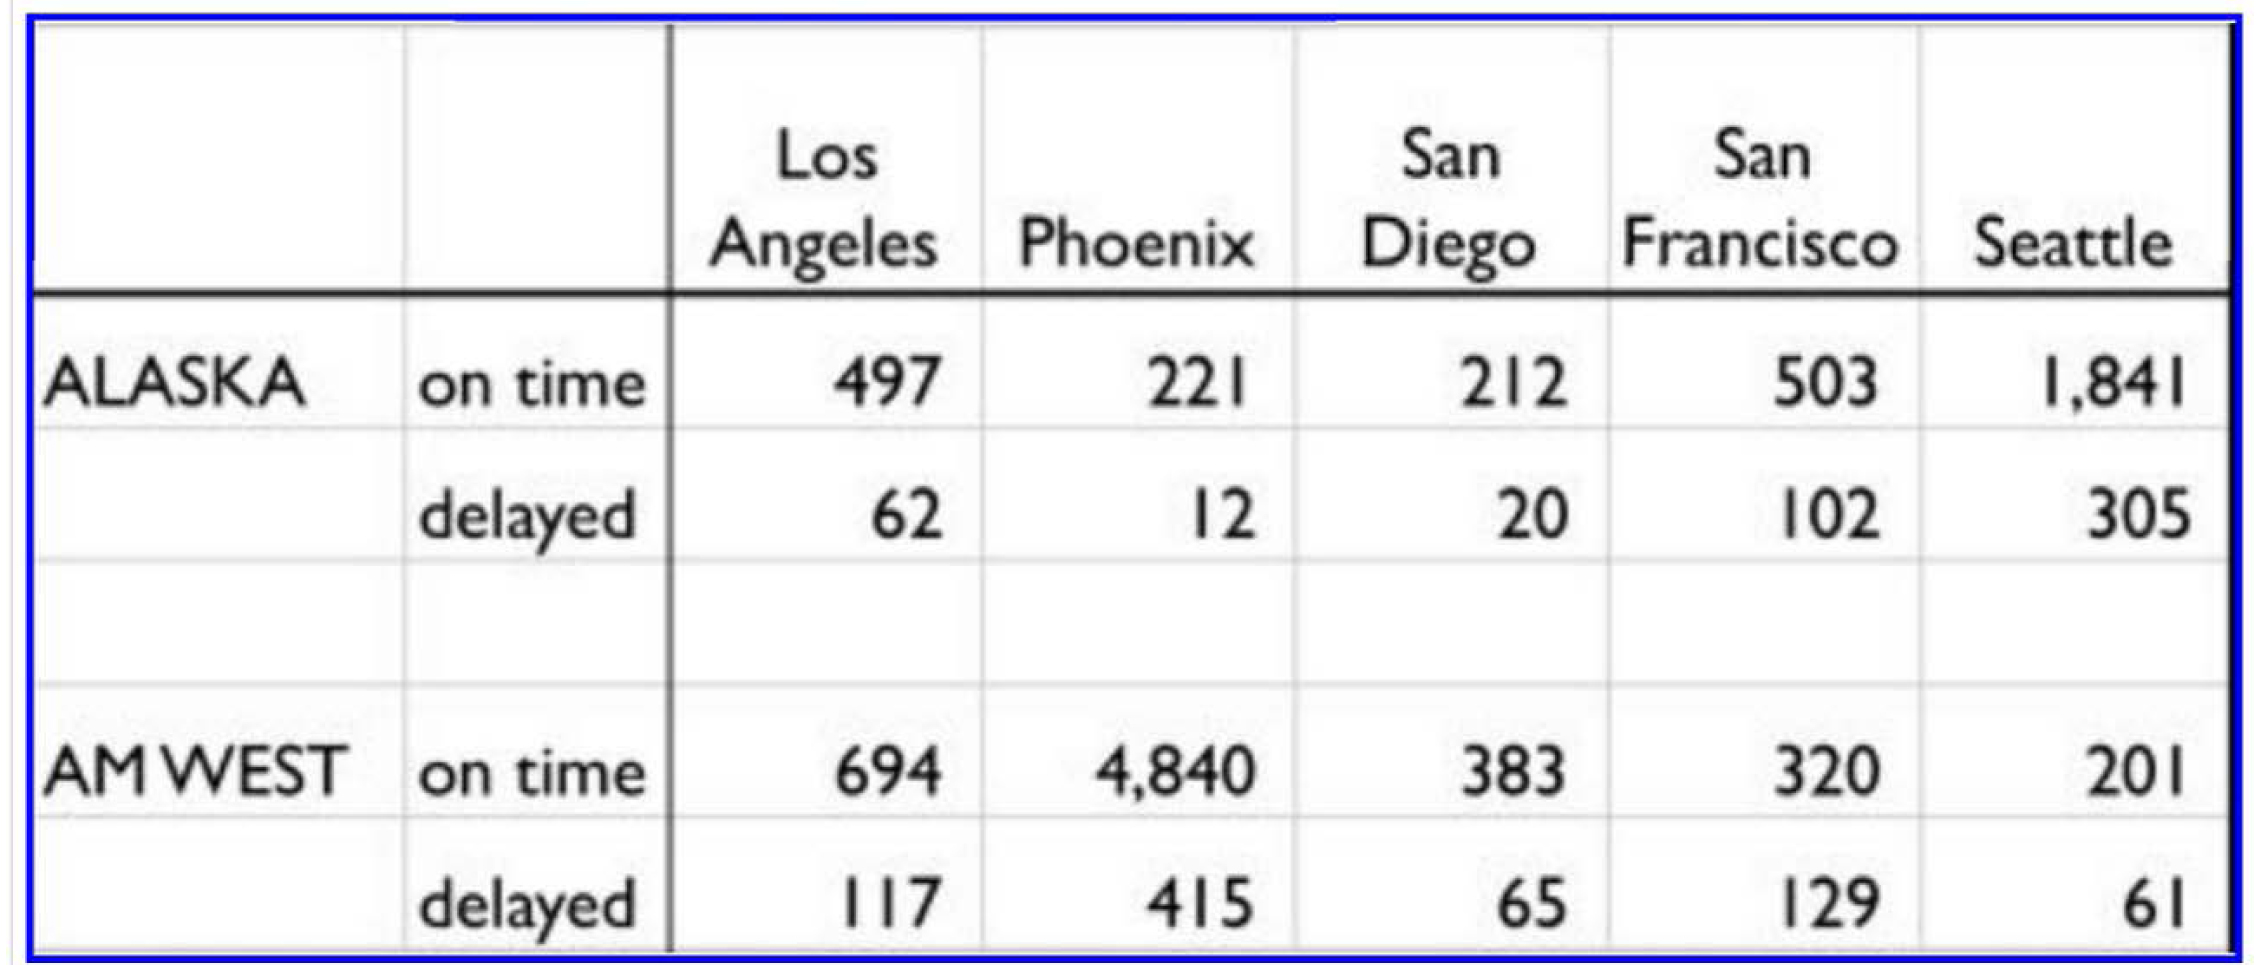

In [1]:
# import library to display image of chart
from IPython import display
# load image from local storage
display.Image("C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project1chart.jpg", width = 600, height = 300)

## Import libraries

Using sqlite3 I will create a database that consists of two tables: on_time and delayed. I will insert the values shown in the chart into the appropriate tables and then execute a join. I will use pandas to write the joined data to a csv document. I will then use pandas to read the csv, then organize and analyze the data.

In [2]:
import sqlite3
import pandas as pd

## Create database and tables

The function sql_connection() established a connection and creates a db file on my local machine. The sql_table function creates two tables: on_time and delayed.

In [3]:
def sql_connection():
    try:
        conn = sqlite3.connect("C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project1database.db")
        return conn
    
    except:
        print("Error in creating Database")


def sql_table(conn):
    cursor_obj = conn.cursor()
    cursor_obj.execute("CREATE TABLE IF NOT EXISTS on_time(airport text, num_flights integer, airline text)")
    cursor_obj.execute("CREATE TABLE IF NOT EXISTS delayed(airport text, num_flights integer, airline text)")
    conn.commit()

In [4]:
conn = sql_connection()

In [5]:
sql_table(conn)

## Insert values

The sql_table function inserts values into the two tables.

In [6]:
def sql_table(conn):
    cursor_obj = conn.cursor()
    cursor_obj.execute("INSERT INTO on_time VALUES('Los Angeles', 497, 'ALASKA')")
    cursor_obj.execute("INSERT INTO on_time VALUES('Phoenix', 221, 'ALASKA')")
    cursor_obj.execute("INSERT INTO on_time VALUES('San Diego', 212, 'ALASKA')")
    cursor_obj.execute("INSERT INTO on_time VALUES('San Francisco', 503, 'ALASKA')")
    cursor_obj.execute("INSERT INTO on_time VALUES('Seattle', 1841, 'ALASKA')")
    cursor_obj.execute("INSERT INTO on_time VALUES('Los Angeles', 694, 'AM WEST')")
    cursor_obj.execute("INSERT INTO on_time VALUES('Phoenix', 4840, 'AM WEST')")
    cursor_obj.execute("INSERT INTO on_time VALUES('San Diego', 383, 'AM WEST')")
    cursor_obj.execute("INSERT INTO on_time VALUES('San Francisco', 320, 'AM WEST')")
    cursor_obj.execute("INSERT INTO on_time VALUES('Seattle', 201, 'AM WEST')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Los Angeles', 62, 'ALASKA')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Phoenix', 12, 'ALASKA')")
    cursor_obj.execute("INSERT INTO delayed VALUES('San Diego', 20, 'ALASKA')")
    cursor_obj.execute("INSERT INTO delayed VALUES('San Francisco', 102, 'ALASKA')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Seattle', 305, 'ALASKA')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Los Angeles', 117, 'AM WEST')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Phoenix', 415, 'AM WEST')")
    cursor_obj.execute("INSERT INTO delayed VALUES('San Diego', 65, 'AM WEST')")
    cursor_obj.execute("INSERT INTO delayed VALUES('San Francisco', 129, 'AM WEST')")
    cursor_obj.execute("INSERT INTO delayed VALUES('Seattle', 61, 'AM WEST')")
    conn.commit()

In [7]:
conn = sql_connection()

In [8]:
sql_table(conn)

## Join tables

Because I opted to create two tables, one that holds on_time data and the other that holds delayed data, I will now join the two tables. The join variable selects airline, airport, the number of on_time flights, and the number of delayed flights. I am joining these tables on the airline values, as those values are shared between the two tables.

In [9]:
join = """SELECT on_time.airline, on_time.airport, on_time.num_flights AS num_on_time, delayed.num_flights AS num_delayed 
FROM on_time JOIN delayed 
ON on_time.airport = delayed.airport AND on_time.airline = delayed.airline 
ORDER BY on_time.airline"""

Printing the results of the join shows a list of tuples. Each tuple contains airline, airport, number of on_time flights, and the number of delayed flights.

In [10]:
cursor=conn.cursor()
cursor.execute(join)
result = cursor.fetchall()
print(result)

[('ALASKA', 'Los Angeles', 497, 62), ('ALASKA', 'Phoenix', 221, 12), ('ALASKA', 'San Diego', 212, 20), ('ALASKA', 'San Francisco', 503, 102), ('ALASKA', 'Seattle', 1841, 305), ('AM WEST', 'Los Angeles', 694, 117), ('AM WEST', 'Phoenix', 4840, 415), ('AM WEST', 'San Diego', 383, 65), ('AM WEST', 'San Francisco', 320, 129), ('AM WEST', 'Seattle', 201, 61)]


Printing the results by row is easier to read.

In [11]:
for row in result:
    print(row)

('ALASKA', 'Los Angeles', 497, 62)
('ALASKA', 'Phoenix', 221, 12)
('ALASKA', 'San Diego', 212, 20)
('ALASKA', 'San Francisco', 503, 102)
('ALASKA', 'Seattle', 1841, 305)
('AM WEST', 'Los Angeles', 694, 117)
('AM WEST', 'Phoenix', 4840, 415)
('AM WEST', 'San Diego', 383, 65)
('AM WEST', 'San Francisco', 320, 129)
('AM WEST', 'Seattle', 201, 61)


## Create a pandas dataframe

Using the pandas library from_records() method, I am creating a DataFrame with the list of tuples created by joining the data of the on_time and delayed flights tables. That list is saved to the variable called "result." pandas allows me to create column names.

In [12]:
df = pd.DataFrame.from_records(result, columns=['airline', 'airport', 'num_on_time', 'num_delayed'])

In [13]:
df

,airline,airport,num_on_time,num_delayed
0,ALASKA,Los Angeles,497,62
1,ALASKA,Phoenix,221,12
2,ALASKA,San Diego,212,20
3,ALASKA,San Francisco,503,102
4,ALASKA,Seattle,1841,305
5,AM WEST,Los Angeles,694,117
6,AM WEST,Phoenix,4840,415
7,AM WEST,San Diego,383,65
8,AM WEST,San Francisco,320,129
9,AM WEST,Seattle,201,61


Though I can work with the DataFrame created here, it is worthwhile to practice writing this data to a csv file.

## Write joined data to a csv

Using the pandas library read_sql() method, I am writing to the local database using the values from the "join" statement to a csv file that I will save to my local machine. 

In [14]:
df = pd.read_sql(join, conn)
df.to_csv("C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project1spreadsheet.csv")

## Use pandas to read the csv

Using the pandas library read_csv() method, I am reading the csv from my local machine back into a pandas DataFrame.

In [15]:
df = pd.read_csv("C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project1spreadsheet.csv", index_col=0)

The .info() method outputs each of the column names and their corresponding data types.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      10 non-null     object
 1   airport      10 non-null     object
 2   num_on_time  10 non-null     int64 
 3   num_delayed  10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


The .head() method outputs the first five records.

In [17]:
df.head()

,airline,airport,num_on_time,num_delayed
0,ALASKA,Los Angeles,497,62
1,ALASKA,Phoenix,221,12
2,ALASKA,San Diego,212,20
3,ALASKA,San Francisco,503,102
4,ALASKA,Seattle,1841,305


### View data by airline

The .groupby() and .sum() methods will perform this calculation on a filtered segment of the DataFrame. In this case, I am grouping the data by airline to find the total on_time and the total delayed flights.

In [18]:
by_airline = df.groupby(['airline']).sum()
by_airline

,num_on_time,num_delayed
airline,,
ALASKA,3274,501
AM WEST,6438,787


But what if I want to see the flight total? To do this, I will add a column and use .sum() on axis 1.

In [19]:
by_airline['total_flights'] = by_airline.sum(axis=1)
by_airline

,num_on_time,num_delayed,total_flights
airline,,,
ALASKA,3274,501,3775
AM WEST,6438,787,7225


I want to see what percent of flights are delayed, still grouped by airline. To do this, I will add a column with a percent calculation.

In [20]:
by_airline['percent_delayed'] = (by_airline['num_delayed']/by_airline['total_flights']) * 100
by_airline

,num_on_time,num_delayed,total_flights,percent_delayed
airline,,,,
ALASKA,3274,501,3775,13.271523
AM WEST,6438,787,7225,10.892734


**About 13% of Alaska Airlines flights are delayed. About 11% of America West Airlines flights are delayed.**

Of the total delayed flights, what percent of these are American West Airlines flights? To see this, I will divide the number of AM WEST delayed flights by the sum of the num_delayed column, and multiply that figure by 100.

In [21]:
by_airline['num_delayed'].sum(axis=0)

1288

In [22]:
by_airline_delayed = by_airline['num_delayed']
by_airline_delayed['AM WEST']

787

In [23]:
((by_airline_delayed['AM WEST']) / (by_airline['num_delayed'].sum(axis=0))) * 100

61.10248447204969

**About 61% of delayed flights are American West Airlines flights.**

## View data by airport

In [24]:
by_airport = df.groupby(['airport']).sum()
by_airport

,num_on_time,num_delayed
airport,,
Los Angeles,1191,179
Phoenix,5061,427
San Diego,595,85
San Francisco,823,231
Seattle,2042,366


I'd like to see the flight total by airport. To do this, I will add a column and use .sum() on axis 1.

In [25]:
by_airport['total_flights'] = by_airport.sum(axis=1)
by_airport

,num_on_time,num_delayed,total_flights
airport,,,
Los Angeles,1191,179,1370
Phoenix,5061,427,5488
San Diego,595,85,680
San Francisco,823,231,1054
Seattle,2042,366,2408


I want to see what percent of flights are delayed, grouped by airport. To do this, I will add a column with a percent calculation.

In [26]:
by_airport['percent_delayed'] = (by_airport['num_delayed']/by_airport['total_flights']) * 100
by_airport

,num_on_time,num_delayed,total_flights,percent_delayed
airport,,,,
Los Angeles,1191,179,1370,13.065693
Phoenix,5061,427,5488,7.780612
San Diego,595,85,680,12.500000
San Francisco,823,231,1054,21.916509
Seattle,2042,366,2408,15.199336


**About 13% of flights arriving in Los Angeles are delayed. A little less than 8% of flights arriving in Phoenix are delayed. 12.5% of flights arriving in San Diego are delayed. About 22% of flights arriving in San Francisco are delayed. And about 15% arriving in Seattle are delayed.**

It might be helpful to see a bar plot showing the percent delayed of the flights arriving to each of the airports in this data set. To do that, I will import matplotlib.

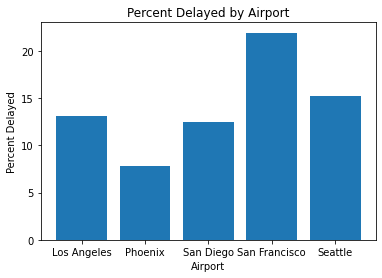

In [27]:
import matplotlib.pyplot as plt
plt.bar(by_airport.index,by_airport['percent_delayed'])
plt.title('Percent Delayed by Airport')
plt.xlabel('Airport')
plt.ylabel('Percent Delayed')
plt.show()

**The bar plot above shows that flights arriving in San Francisco are more likely - than the other airports in this data set - to experience delays.**

It might be helpful to see a plot showing the breakdown of delays by the airport *and* by the airline. To do this, I will import seaborn as it allows for a hue parameter that I can use to indicate airline by color. 

I'll use my df DataFrame so that I can access values by the airport and by the airline. The df DataFrame doesn't have a percent_delayed column, so I will have to add that in. First, I'll plot df using the num_delayed, which will show the sum of all delayed flights by airport and airline.

In [28]:
import seaborn as sns

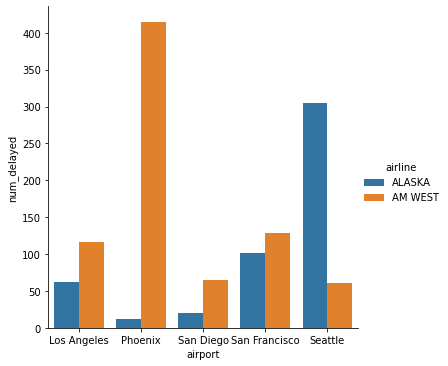

In [29]:
sns.catplot(x="airport", y="num_delayed", hue="airline", kind="bar", data=df)

**American West Airlines is responsible for a larger number of delayed flights arriving to all airports *except* Seattle.**

In [30]:
df

,airline,airport,num_on_time,num_delayed
0,ALASKA,Los Angeles,497,62
1,ALASKA,Phoenix,221,12
2,ALASKA,San Diego,212,20
3,ALASKA,San Francisco,503,102
4,ALASKA,Seattle,1841,305
5,AM WEST,Los Angeles,694,117
6,AM WEST,Phoenix,4840,415
7,AM WEST,San Diego,383,65
8,AM WEST,San Francisco,320,129
9,AM WEST,Seattle,201,61


Before I can add a percent_delayed column to df, I need a total_flights column.

In [31]:
df['total_flights'] = df.sum(axis=1)
df

,airline,airport,num_on_time,num_delayed,total_flights
0,ALASKA,Los Angeles,497,62,559
1,ALASKA,Phoenix,221,12,233
2,ALASKA,San Diego,212,20,232
3,ALASKA,San Francisco,503,102,605
4,ALASKA,Seattle,1841,305,2146
5,AM WEST,Los Angeles,694,117,811
6,AM WEST,Phoenix,4840,415,5255
7,AM WEST,San Diego,383,65,448
8,AM WEST,San Francisco,320,129,449
9,AM WEST,Seattle,201,61,262


In [32]:
df['percent_delayed'] = (df['num_delayed']/df['total_flights']) * 100
df

,airline,airport,num_on_time,num_delayed,total_flights,percent_delayed
0,ALASKA,Los Angeles,497,62,559,11.091234
1,ALASKA,Phoenix,221,12,233,5.150215
2,ALASKA,San Diego,212,20,232,8.620690
3,ALASKA,San Francisco,503,102,605,16.859504
4,ALASKA,Seattle,1841,305,2146,14.212488
5,AM WEST,Los Angeles,694,117,811,14.426634
6,AM WEST,Phoenix,4840,415,5255,7.897241
7,AM WEST,San Diego,383,65,448,14.508929
8,AM WEST,San Francisco,320,129,449,28.730512
9,AM WEST,Seattle,201,61,262,23.282443


Using the percent_delayed column, I can now plot the percent of delayed flights by airport and airline.

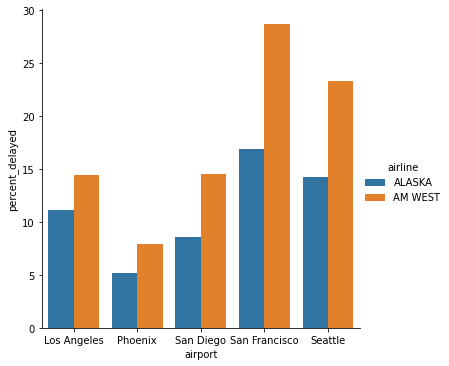

In [33]:
sns.catplot(x="airport", y="percent_delayed", hue="airline", kind="bar", data=df)

**By percent, American West Airlines is responsible for a larger portion of delays arriving to all airports in this data set.**